In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정 - 윈도우 
plt.rcParams['font.family'] = 'Malgun Gothic'

# 글자 크기
plt.rcParams['font.size'] = 15

# 폰트 설정 시 - 기호 깨는 거 방지하기
plt.rcParams['axes.unicode_minus'] = False

# 그래프의 크기
plt.rcParams['figure.figsize'] = 15,7

# seaborn에서 제공하는 그래프 테마
# sns.set_style('ticks')
# sns.set_style('darkgrid')
# sns.set_style('whitegrid')

# 1.데이터 가져오기

mpg 데이터는 1988년, 2004년, 2008년도에 미국에서 생산되 자동차 관련 정보

- manufacutrer : 제조사
- model : 자동차 모델명
- displ : 배기량
- year : 생산년도
- cyl : 실린더개수
- trans : 변속기 종류
- drv : 구동방식
- cty : 시내연비
- hwy : 고속도로연비
- fl : 연료종류(c : 가스, d : 디젤, e : 에탄올 혼합연로, p : 고급휘발유, r : 보통휘발유)
- class : 자동차 종류

In [ ]:
mpg_df = pd.read_excel('data/mpg.xlsx')
mpg_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
# 데이터 프레임의 크기를 확인한다.
a1, a2 = mpg_df.shape
print(f'행의크기 : {a1}')
print(f'열의크기 : {a2}')

행의크기 : 234
열의크기 : 12


In [ ]:
# 데이터 프레임 개요 정보
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


# 2.문제1 : 자동차 배기량에 따라 고속도로 연비가 다른지 알아본다.

- displ(배기량)이 4이하인 자동차와 5이상인 자동차 중 어떤 자동차의 hwy(고속도로 연비)가 평균적으로 더 높은지 알아보세요

In [ ]:
# 배기량이 4이하인 자동차들의 고속도로 연비 평균
displ4 = mpg_df.query('displ <= 4').mean()
a1 = displ4['hwy']

# 배기량이 4초과인 자동차들의 평균
displ5 = mpg_df.query('displ > 4').mean()
a2 = displ5['hwy'].mean()
a1, a2

(25.96319018404908, 17.64788732394366)

,배기량 4 이하,배기량 4 초과
고속도로 연비 평균,25.96319,17.647887


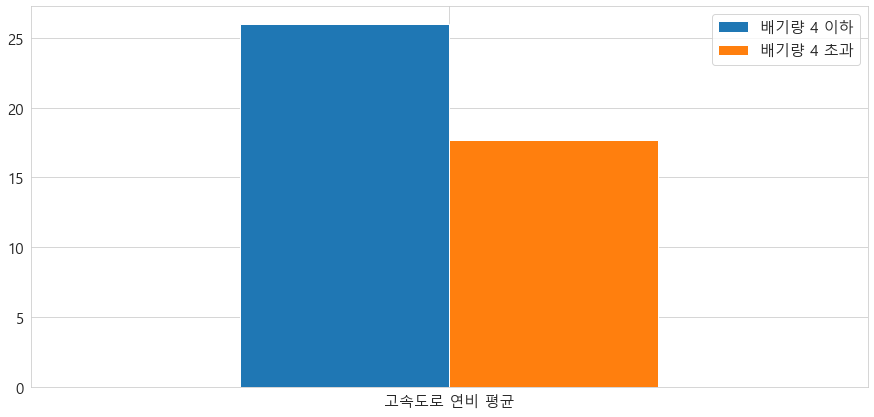

In [ ]:
# 데이터 프레임 생성
d1 = {
    '배기량 4 이하' : [a1],
    '배기량 4 초과' : [a2]    
}

tmp_df = pd.DataFrame(d1)
tmp_df.index = ['고속도로 연비 평균']
display(tmp_df)

tmp_df.plot.bar()
plt.xticks(rotation=360)
plt.show()

,고속도로 평균 연비
배기량 4 이하,25.963190
배기량 4 초과,17.647887


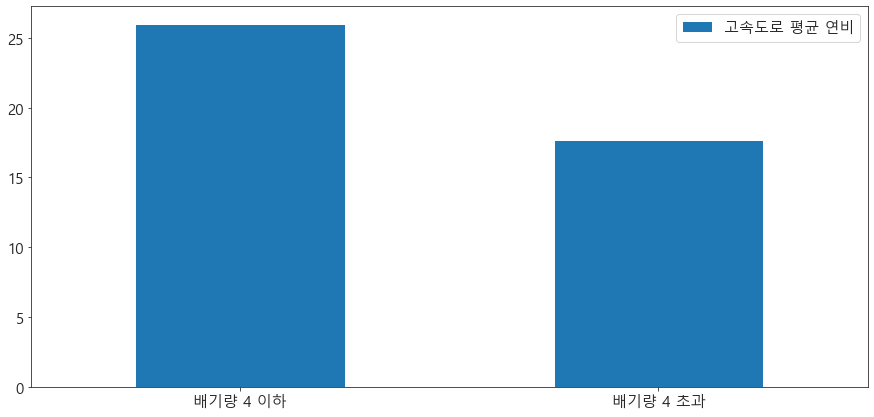

In [ ]:
d1 = {
    '고속도로 평균 연비' : [a1, a2]
}

temp_df = pd.DataFrame(d1)
temp_df.index = ['배기량 4 이하','배기량 4 초과']
display(temp_df)

temp_df.plot.bar()
plt.xticks(rotation=360)
plt.legend()
plt.show()

,배기량,고속도로 평균 연비
0,4 이하,25.963190
1,4 초과,17.647887


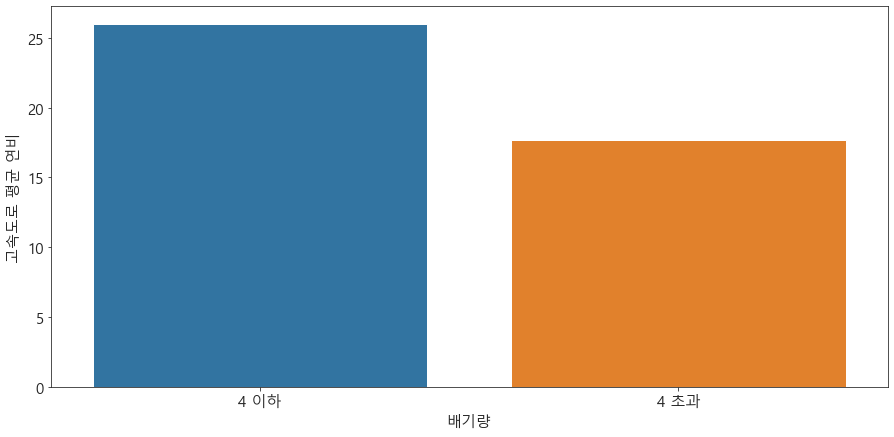

In [ ]:
d1 = {
    '배기량' : ['4 이하', '4 초과'],
    '고속도로 평균 연비' : [a1, a2]
}

temp_df = pd.DataFrame(d1)
display(temp_df)

sns.barplot(x = '배기량',
            y = '고속도로 평균 연비', 
            data=temp_df)
plt.show()

# 3.문제2 : 자동차 제조 회사에 따라 시내 연비가 다른지 알아본다.

In [ ]:
mpg_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
ma = mpg_df[['manufacturer','cty']]
df_result = ma.groupby('manufacturer').mean()
df_result.sort_values('cty',ascending=False,inplace=True)

# 데이터 프레임의 인덱스를 리셋한다.(이 때 drop=True를 하지 않으면 인텍스가 컬럼으로 포함된다.)
df_result.reset_index(inplace=True)
df_result.columns = ['제조사','도시 연비 평균']

display(df_result)

,제조사,도시 연비 평균
0,honda,24.444444
1,volkswagen,20.925926
2,subaru,19.285714
3,hyundai,18.642857
4,toyota,18.529412
5,nissan,18.076923
6,audi,17.611111
7,pontiac,17.000000
8,chevrolet,15.000000
9,ford,14.000000


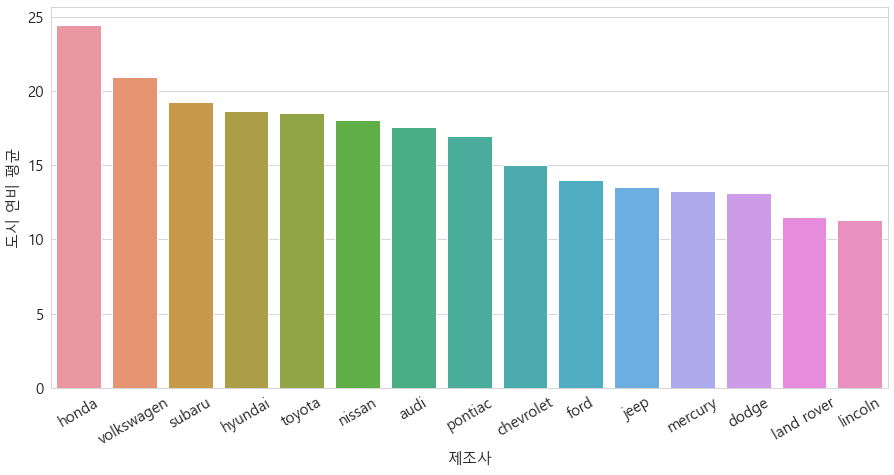

In [ ]:
sns.barplot(x = '제조사', y = '도시 연비 평균', data=df_result)
plt.xticks(rotation=30)
plt.show()